In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/6/healthify/ML models and notebooks/datasets/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no missing values, but need to convert the object clumns into numerical

For Sex column let's have male=0 and female=1

In [7]:
# Replacing levels of numeric int
df["Sex"].replace({'F': 1, 'M': 0}, inplace=True)
print('Sex: ', df['Sex'].unique())

Sex:  [0 1]


For Chest pain type feature,
we have TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
                
So we will replace with,
TA = 0
ATA = 1
NAP = 2
ASY = 3


In [9]:
# Replacing levels of numeric int
df["ChestPainType"].replace({'ATA': 1, 'TA': 0, 'NAP': 2, 'ASY': 3}, inplace=True)
print('ChestPainType ', df['ChestPainType'].unique())

ChestPainType  [1 2 3 0]


In [10]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [11]:
# Replacing levels of numeric int
df["RestingECG"].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
print('RestingECG ', df['RestingECG'].unique())

RestingECG  [0 1 2]


In [12]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
# Replacing levels of numeric int
df["ExerciseAngina"].replace({'N': 0, 'Y': 1}, inplace=True)
print('ExerciseAngina ', df['ExerciseAngina'].unique())

ExerciseAngina  [0 1]


In [14]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [15]:
# Replacing levels of numeric int
df["ST_Slope"].replace({'Flat': 0, 'Up': 1, 'Down': 2}, inplace=True)
print('ST_Slope ', df['ST_Slope'].unique())

ST_Slope  [1 0 2]


In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,1,0
1,49,1,2,160,180,0,0,156,0,1.0,0,1
2,37,0,1,130,283,0,1,98,0,0.0,1,0
3,48,1,3,138,214,0,0,108,1,1.5,0,1
4,54,0,2,150,195,0,0,122,0,0.0,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<AxesSubplot:>

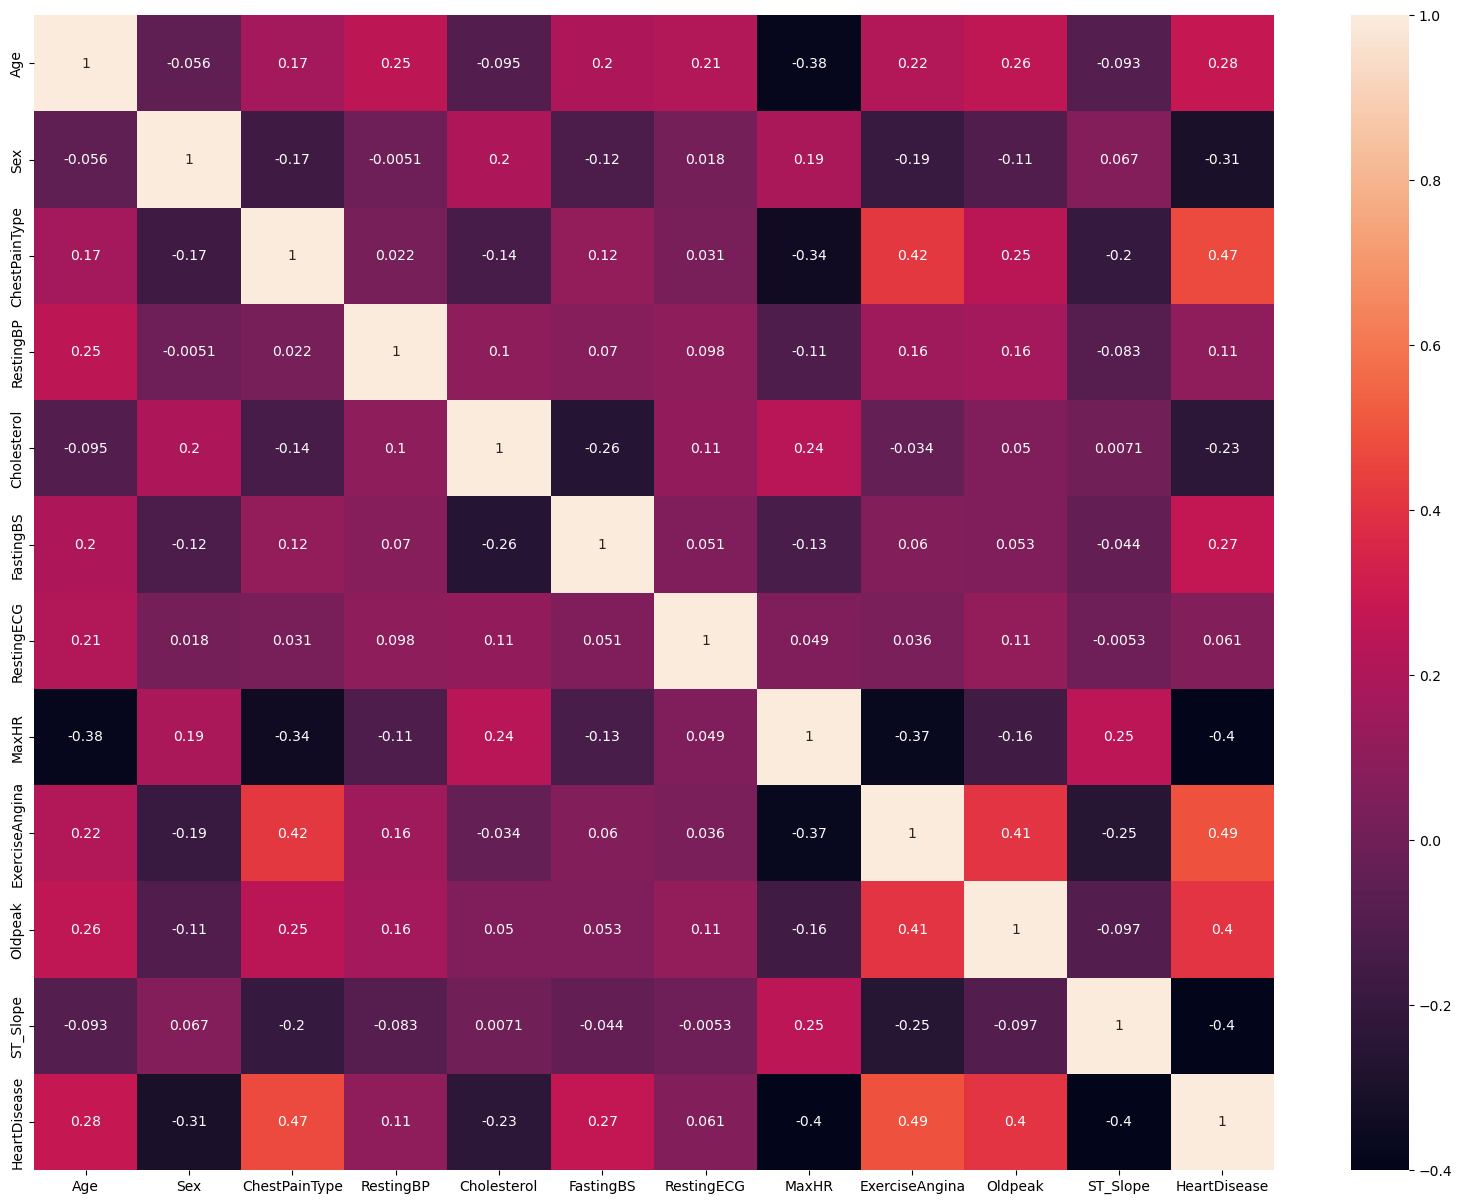

In [18]:
import seaborn as sns
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, )

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, log_loss

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((734, 11), (184, 11))

In [26]:
models = {
    'GradientBoosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra': ExtraTreesClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'Cat': CatBoostClassifier(silent=True),
    'XGB': XGBClassifier(),
    'XGBRF': XGBRFClassifier(),
    "LGBM": LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
  
}

In [30]:
#helper function for fitting and evaluating models

def fit_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        
        
        #score = precision_score(preds, y_test, average='macro')
        print(f'{name}')
        print(log_loss(preds, y_test))
        print(classification_report(preds, y_test))
        #print(f'{name}: {score}')
        print()

In [31]:
fit_evaluate(models, X_train, X_test, y_train, y_test)

GradientBoosting
4.3174078882987414
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184


Bagging
5.255996359787845
              precision    recall  f1-score   support

           0       0.92      0.76      0.84        93
           1       0.79      0.93      0.86        91

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184


Extra
3.7542669731922618
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.89      0.92      0.90       103

    accuracy                           0.89       184
   macro avg       0.89      0.89      

In [32]:
baseline_model = CatBoostClassifier(silent=True)
baseline_model.fit(X_train,y_train)
preds = baseline_model.predict(X_test)

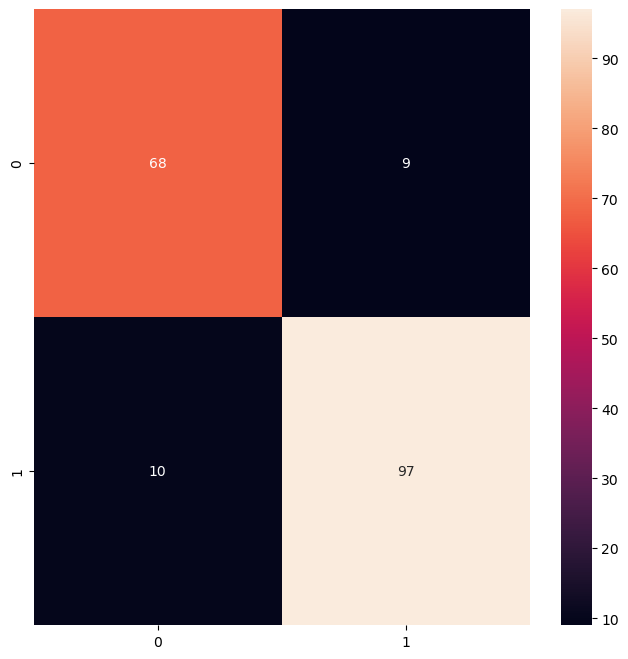

In [33]:
conf_matrix = confusion_matrix(y_test,preds)
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_matrix,annot=True);

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
params_grid = {
    # Parameters that we are going to tune.
    'max_depth':[5,6,7],

    'learning_rate':[0.01,0.1,0.3],
    'subsample':[1,2,3],

    'n_estimators':[100,900,1000]
}

In [38]:
cat_grid = GridSearchCV(CatBoostClassifier(silent=True),params_grid,cv=5,verbose=True,n_jobs=-1)
cat_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\6\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\6\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\6\anaconda3\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\6\anaconda3\lib\site-packages\catboost\core.py", line 2339, in _fit
    tr

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E887A3BD90>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 900, 1000],
                         'subsample': [1, 2, 3]},
             verbose=True)

In [39]:
cat_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}

In [41]:
preds_grid = cat_grid.predict(X_test)
loss_grid = log_loss(y_test,preds_grid)
loss_grid

3.1911173668093653

In [42]:
final_model =  CatBoostClassifier(silent=True, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1)
final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)
loss = log_loss(preds, y_test)
loss

3.1911217124475733

In [43]:
import joblib
joblib.dump(final_model, 'heart_failure')

['heart_failure']